In [1]:
# Exploratory Data Analysis 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# check for required file

import os
from pathlib import Path

FILE_PATH = '../data/NYPD_Complaint_Data_Historic_Cleaned_Reduced_Merged.csv'

file_path = Path(FILE_PATH)

# Check if the file exists
if file_path.exists():
    print(f"File found: {file_path}")
else:
    print(f"File not found: {file_path}. Please ensure the file is downloaded correctly.")

File found: ../data/NYPD_Complaint_Data_Historic_Cleaned_Reduced_Merged.csv


In [3]:
# Load the dataset
import pandas as pd
import numpy as np

df = pd.read_csv(FILE_PATH)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1588788 entries, 0 to 1588787
Data columns (total 13 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   OFNS_DESC                        1588788 non-null  object 
 1   BORO_NM                          1588788 non-null  object 
 2   PREM_TYP_DESC                    1588788 non-null  object 
 3   Latitude                         1588788 non-null  float64
 4   Longitude                        1588788 non-null  float64
 5   VIC_AGE_GROUP                    1588788 non-null  object 
 6   VIC_RACE                         1588788 non-null  object 
 7   VIC_SEX                          1588788 non-null  object 
 8   Hour                             1588788 non-null  float64
 9   OFNS_DESC_Severity_Score         1588788 non-null  int64  
 10  Crime_Category                   1588788 non-null  object 
 11  local_population_count_1km       1588788 non-null 

In [4]:
df.head()

,OFNS_DESC,BORO_NM,PREM_TYP_DESC,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Hour,OFNS_DESC_Severity_Score,Crime_Category,local_population_count_1km,mental_health_service_count_1km
0,ROBBERY,BROOKLYN,STREET,40.701593,-73.948747,<18,WHITE,M,19.0,8,Violent Crimes,201434.0,4
1,RAPE,MANHATTAN,STREET,40.737203,-73.983273,<18,BLACK,F,23.0,10,Violent Crimes,310938.0,20
2,RAPE,BRONX,HOSPITAL,40.810352,-73.924942,<18,BLACK,F,23.0,10,Violent Crimes,224242.0,12
3,FELONY ASSAULT,QUEENS,OTHER,40.593680,-73.790074,25-44,WHITE,F,12.0,9,Violent Crimes,214372.0,0
4,ROBBERY,BRONX,STREET,40.859853,-73.894368,<18,BLACK HISPANIC,M,20.0,8,Violent Crimes,229936.0,8


In [5]:
df.describe()

,Latitude,Longitude,Hour,OFNS_DESC_Severity_Score,local_population_count_1km,mental_health_service_count_1km
count,1.588788e+06,1.588788e+06,1.588788e+06,1.588788e+06,1.588788e+06,1.588788e+06
mean,4.073401e+01,-7.392170e+01,1.308779e+01,4.713139e+00,1.991865e+05,4.680816e+00
std,8.460231e-02,7.853914e-02,6.603306e+00,2.286923e+00,6.870910e+04,5.340357e+00
min,4.049890e+01,-7.425495e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.067026e+01,-7.396587e+01,9.000000e+00,3.000000e+00,1.553170e+05,1.000000e+00
50%,4.072812e+01,-7.392335e+01,1.400000e+01,4.000000e+00,1.883170e+05,3.000000e+00
75%,4.081334e+01,-7.387832e+01,1.800000e+01,7.000000e+00,2.331990e+05,7.000000e+00
max,4.091271e+01,-7.370056e+01,2.300000e+01,1.000000e+01,9.063490e+05,3.200000e+01


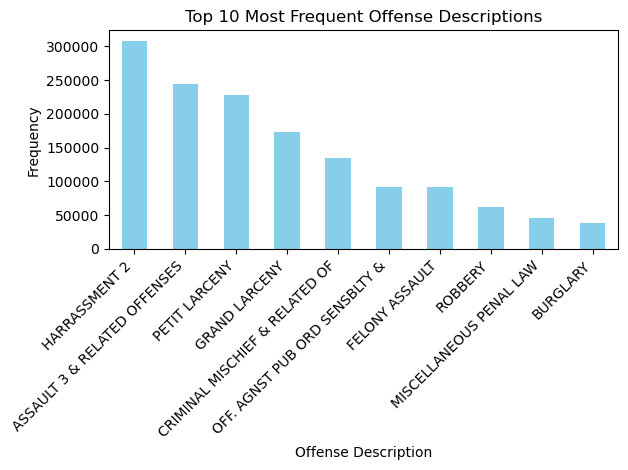

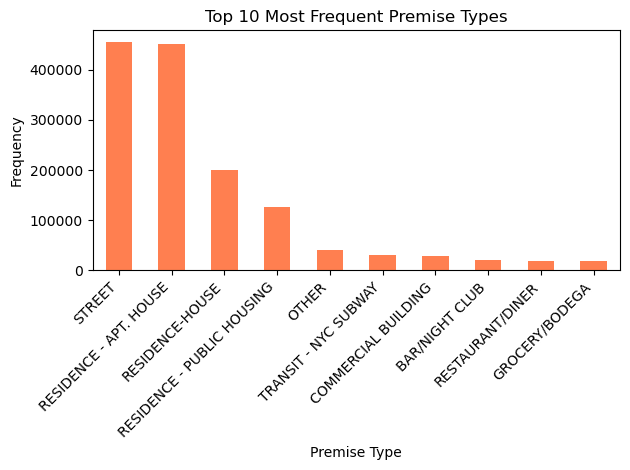

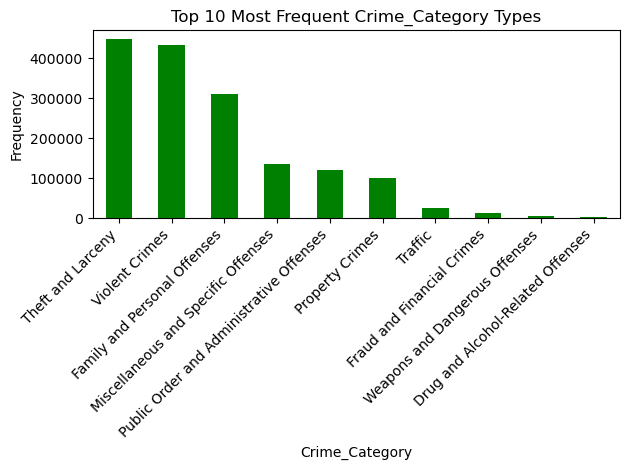

In [6]:
# Plotting top 10 most frequent Offense Descriptions
top_ofns_desc = df['OFNS_DESC'].value_counts().head(10)
top_ofns_desc.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Offense Descriptions')
plt.xlabel('Offense Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Improve label visibility by rotating them
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

# Plotting top 10 most frequent Premise Types
top_prem_typ_desc = df['PREM_TYP_DESC'].value_counts().head(10)
top_prem_typ_desc.plot(kind='bar', color='coral')
plt.title('Top 10 Most Frequent Premise Types')
plt.xlabel('Premise Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Improve label visibility by rotating them
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

# Plotting top 10 most frequent Crime_Category
top_prem_typ_desc = df['Crime_Category'].value_counts().head(10)
top_prem_typ_desc.plot(kind='bar', color='green')
plt.title('Top 10 Most Frequent Crime_Category Types')
plt.xlabel('Crime_Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Improve label visibility by rotating them
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

Chi-Square Statistic: 106428.09620727118
p-value: 0.0


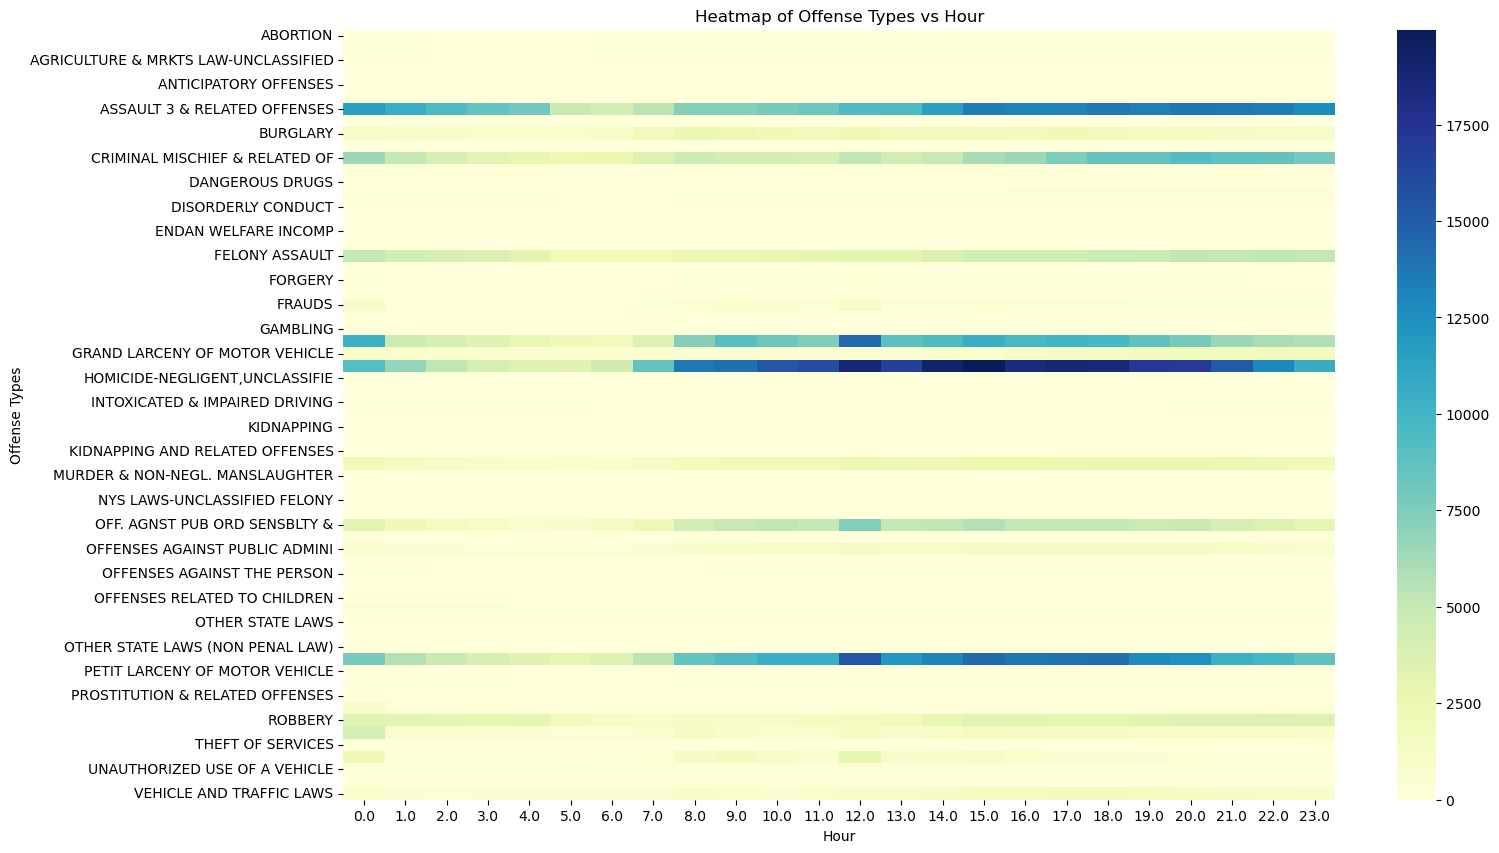

In [7]:
# Hypothesis: The occurrence of offenses (OFNS_DESC) is independent of the time of day (CMPLNT_FR_TM).
# This hypothesis examines whether certain types of crimes are more likely to occur at specific times of the day. 
# If rejected, it could suggest that some crimes are more prevalent during certain hours.
# Create a contingency table of OFNS_DESC vs Hour
contingency_table = pd.crosstab(df['OFNS_DESC'], df['Hour'])

# Perform Chi-Square test
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"p-value: {p_val}")

# Creating the heatmap from the contingency table
plt.figure(figsize=(16, 10))
sns.heatmap(contingency_table, cmap="YlGnBu", annot=False, fmt="d")
plt.title('Heatmap of Offense Types vs Hour')
plt.xlabel('Hour')
plt.ylabel('Offense Types')
plt.show()

In [8]:
# p-value is low: this means there is a statistically significant relationship
# data suggests that the type of offense is not independent of the time of day it occurs; 
# certain offenses are more likely to occur at specific times.


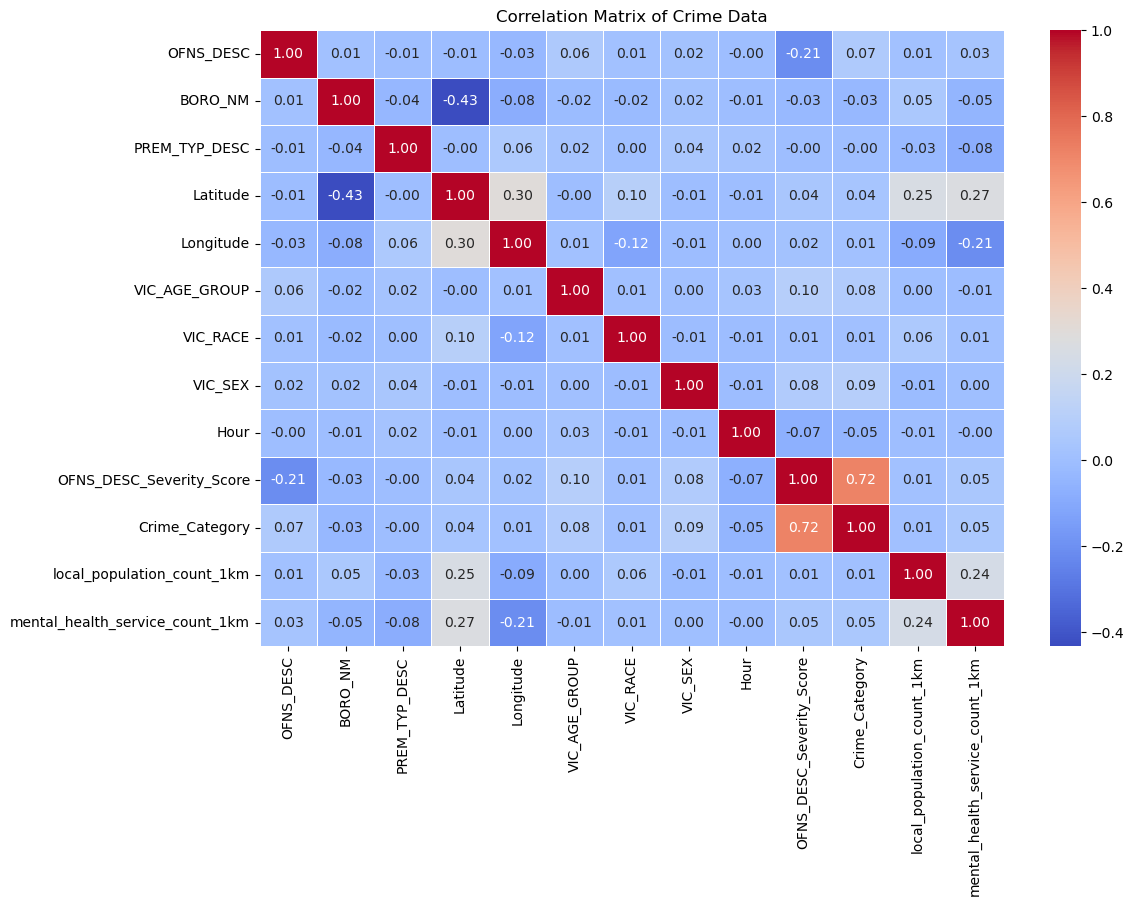

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numeric using Label Encoding
label_encoders = {}
for column in ['OFNS_DESC', 'BORO_NM', 'PREM_TYP_DESC', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'Crime_Category']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store the label encoder for later use if needed

# Now create the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Crime Data')
plt.show()

/Users/markfinlay/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/markfinlay/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/markfinlay/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/markfinlay/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

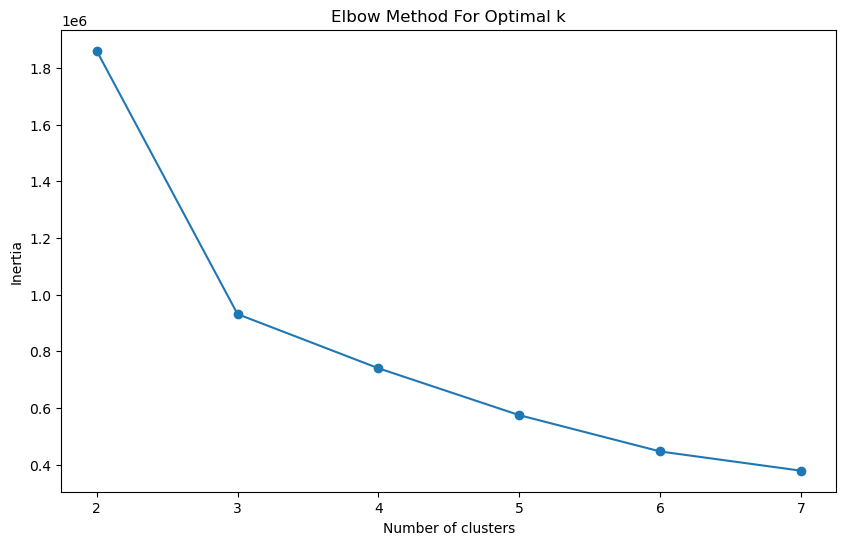

,OFNS_DESC,BORO_NM,PREM_TYP_DESC,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Hour,OFNS_DESC_Severity_Score,Crime_Category,local_population_count_1km,mental_health_service_count_1km
0,56,1,74,40.701593,-73.948747,107,4,3,19.0,8,9,201434.0,4
1,55,2,74,40.737203,-73.983273,107,2,2,23.0,10,9,310938.0,20
2,55,0,38,40.810352,-73.924942,107,2,2,23.0,10,9,224242.0,12
3,18,3,52,40.593680,-73.790074,74,4,2,12.0,9,9,214372.0,0
4,56,0,74,40.859853,-73.894368,107,3,3,20.0,8,9,229936.0,8


In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

numerical_features = ['Crime_Category', 'mental_health_service_count_1km']

# Create a transformer numerical data
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features)])

# Fit and transform the data
df_processed = preprocessor.fit_transform(df)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters (k)
inertia = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_processed)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 8), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
df.head()

In [11]:
# it appears that the most significant drop in inertia occurs as the number of clusters increases from 2 to 3. 
# After three clusters, the decrease in inertia becomes more gradual. This suggests that 3 clusters might 
# indeed be a good choice for this particular dataset and the features you have selected 
# ('Crime_Category' and 'mental_health_service_count_1km').

kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(df_processed)
df['Cluster'] = cluster_labels

/Users/markfinlay/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


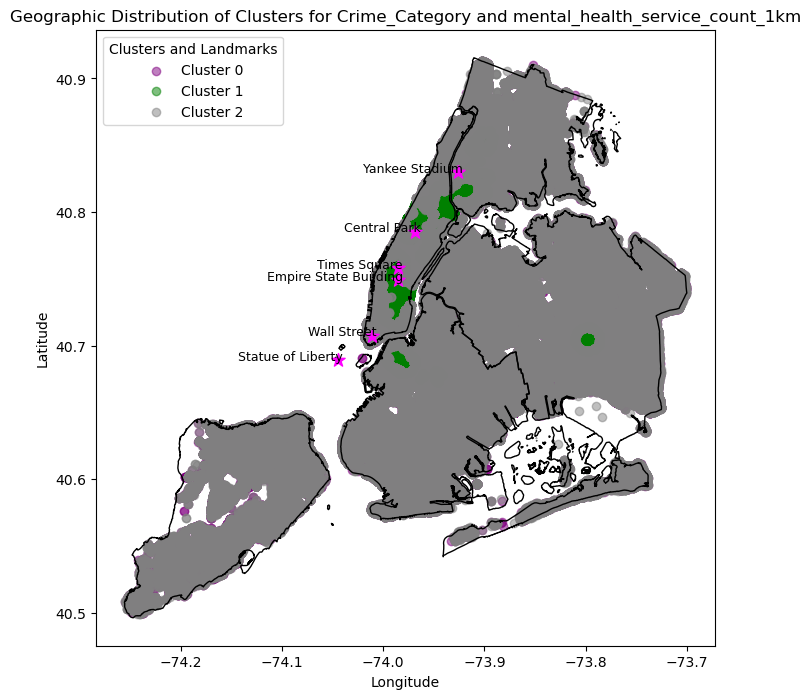

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the shapefile containing the borough boundaries
boroughs = gpd.read_file('../mappings/boundaries/boundaries.shp')
# Ensure the coordinate reference system (CRS) matches between your shapefile and your data
boroughs = boroughs.to_crs(epsg=4326)  # EPSG:4326 is commonly used for lat/lon data

# Load landmarks data from CSV file
landmarks_df = pd.read_csv('../mappings/nyc_landmarks.csv')

# Your DataFrame 'df' should have 'Latitude', 'Longitude', and 'Cluster' columns
# Here we manually specify colors for each cluster
cluster_colors = {0: 'purple', 1: 'green', 2: 'grey'}

# Create the scatter plot for each cluster with distinct colors
plt.figure(figsize=(12, 8))
for cluster, color in cluster_colors.items():
    # Select the data for the current cluster
    subset = df[df['Cluster'] == cluster]
    plt.scatter(subset['Longitude'], subset['Latitude'], color=color, label=f'Cluster {cluster}', alpha=0.5)

# Plot the borough boundaries
boroughs.plot(ax=plt.gca(), edgecolor='black', facecolor='none', linewidth=1)

# Plot each landmark with a distinct marker
for index, row in landmarks_df.iterrows():
    plt.scatter(row['Longitude'], row['Latitude'], color='magenta', s=100, marker='*')  # Landmarks in magenta
    plt.text(row['Longitude'] + 0.005, row['Latitude'], row['Place'], fontsize=9, ha='right')

# Adding titles and labels
plt.title('Geographic Distribution of Clusters for Crime_Category and mental_health_service_count_1km')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper left', title='Clusters and Landmarks')

plt.show()

Correlation coefficient between local population count and crime count: 0.06595211460978428


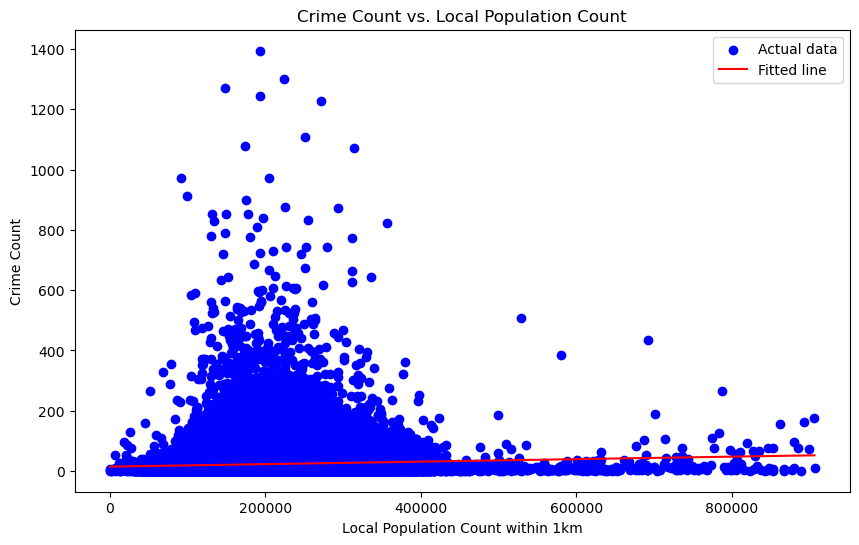

Coefficient (Slope): 4.133150003340644e-05
Intercept: 14.604481547906001


In [13]:
# Hypothesis 1: Higher local population densities (local_population_count_1km) 
# are associated with higher crime rates.

import pandas as pd

# Assume df is your main DataFrame and it contains a count of crimes per location
# If 'Crime_Count' doesn't exist, you might need to create it by aggregating data
# For demonstration, let's assume it already exists

# For this example, let's create a simple count of crimes by the key 'local_population_count_1km'
# Assuming each row is a crime incident
crime_counts = df.groupby('local_population_count_1km').size().reset_index(name='Crime_Count')

correlation = crime_counts['local_population_count_1km'].corr(crime_counts['Crime_Count'])
print(f"Correlation coefficient between local population count and crime count: {correlation}")

from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Reshape data for sklearn
X = crime_counts['local_population_count_1km'].values.reshape(-1, 1)
y = crime_counts['Crime_Count'].values

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Fitted line')
plt.title('Crime Count vs. Local Population Count')
plt.xlabel('Local Population Count within 1km')
plt.ylabel('Crime Count')
plt.legend()
plt.show()

# Output the coefficients
print(f"Coefficient (Slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

In [14]:
# Based on the scatter plot and regression analysis you've shared, the correlation coefficient between 
# local population count and crime count is relatively low (0.0695), indicating a very weak positive 
# linear relationship. This means that while there is a slight increase in crime count as the local 
# population count increases, the effect is not very strong.

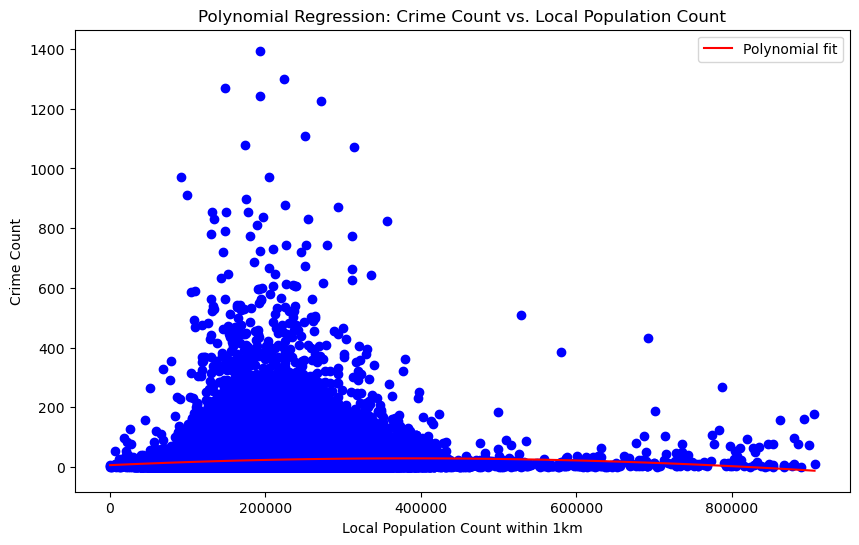

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a polynomial regression model of the 2nd degree
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())

# Fit the model
poly_model.fit(X.reshape(-1, 1), y)

# Predict and plot
X_fit = np.linspace(X.min(), X.max(), 100)
y_poly_fit = poly_model.predict(X_fit.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.plot(X_fit, y_poly_fit, color='red', label='Polynomial fit')
plt.title('Polynomial Regression: Crime Count vs. Local Population Count')
plt.xlabel('Local Population Count within 1km')
plt.ylabel('Crime Count')
plt.legend()
plt.show()

In [16]:
# Hypothesis 1: Higher local population densities (local_population_count_1km) 
# are associated with higher crime rates.

# Reject Hypothesis 1: Given the weak correlation and poor model fit, there isn't enough statistical 
# evidence to accept the hypothesis that higher local population densities are associated with significantly 
# higher crime rates. The data does not demonstrate a strong or consistent enough relationship to support 
# this claim.


In [17]:
# Hypothesis: The prevalence of different types of crimes (OFNS_DESC) varies across different boroughs (BORO_NM).
# Test: chi-squared test of independence to explore if crime types are distributed differently across boroughs.
from scipy.stats import chi2_contingency

# Create the contingency table for the chi-squared test
contingency_table = pd.crosstab(df['BORO_NM'], df['OFNS_DESC'])

# Conduct the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")


Chi-squared Statistic: 62643.38845050815
P-value: 0.0
Degrees of Freedom: 248


In [18]:
# The p-value of 0.0 strongly suggests rejection of the null hypothesis. 
# Conclude with high confidence that there is a statistically significant association 
# between the types of crimes (OFNS_DESC) and the boroughs (BORO_NM) in which they occur.

In [19]:
df.head()

,OFNS_DESC,BORO_NM,PREM_TYP_DESC,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Hour,OFNS_DESC_Severity_Score,Crime_Category,local_population_count_1km,mental_health_service_count_1km,Cluster
0,56,1,74,40.701593,-73.948747,107,4,3,19.0,8,9,201434.0,4,2
1,55,2,74,40.737203,-73.983273,107,2,2,23.0,10,9,310938.0,20,1
2,55,0,38,40.810352,-73.924942,107,2,2,23.0,10,9,224242.0,12,1
3,18,3,52,40.593680,-73.790074,74,4,2,12.0,9,9,214372.0,0,2
4,56,0,74,40.859853,-73.894368,107,3,3,20.0,8,9,229936.0,8,2
